In [483]:
import pandas as pd

## PART 0: Setting up the Environment

In [484]:
#3. Reading the dataset into Pandas DataFrame
Sales_Report_df = pd.read_excel('Project1_JosephAkumatey1.xlsx', index_col = 'Row ID')

In [485]:
Sales_Report_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [486]:
#4.a. Printing the number of columns in the sales report data
Sales_Report_df.shape[1]

20

In [487]:
#4.b. Printing the columns' names
Sales_Report_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [488]:
#4.c. Printing the number of rows in the sales report data
Sales_Report_df.shape[0]

9994

In [489]:
#4.d. The data types for the different columns
Sales_Report_df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## PART 1: Data Categorization and Cleaning

In [490]:
# Checking for any Duplicated data (rows) from the dataset.
Sales_Report_df.duplicated().any()

True

In [491]:
Sales_Report_df.shape

(9994, 20)

In [492]:
#1.a. Dropping any Duplicated data (rows) from the dataset.
Sales_Report_df.drop_duplicates(inplace = True )

In [493]:
#Verifying if the duplicated values have been dropped.
Sales_Report_df.shape

(9993, 20)

In [494]:
import numpy as np

In [495]:
#1.d.i Getting the numeric columns
def get_dtype_columns(df, type_):
    if type_ == "numeric":
        return df.select_dtypes(include=[np.number]).columns.values
    else:
        return df.select_dtypes(exclude=[np.number]).columns.values
numeric_columns = get_dtype_columns(Sales_Report_df, "numeric")
numeric_columns

array(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype=object)

In [496]:
#1.d.ii Getting the non-numeric columns
non_numeric_columns = get_dtype_columns(Sales_Report_df, "non_numeric")

In [497]:
non_numeric_columns

array(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype=object)

In [498]:
Sales_Report_df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [499]:
Sales_Report_df.shape

(9993, 20)

In [500]:
# 1.c. Percentage of missing values for each columns in the dataset.
for col in Sales_Report_df.columns:
    percentage_of_missing = np.mean(Sales_Report_df[col].isna())
    print('{} - {}%'.format(col, round(percentage_of_missing)))

Order ID - 0%
Order Date - 0%
Ship Date - 0%
Ship Mode - 0%
Customer ID - 0%
Customer Name - 0%
Segment - 0%
Country - 0%
City - 0%
State - 0%
Postal Code - 0%
Region - 0%
Product ID - 0%
Category - 0%
Sub-Category - 0%
Product Name - 0%
Sales - 0%
Quantity - 0%
Discount - 0%
Profit - 0%


In [501]:
# 1.d. Replacing the numerical feature which has missing values less than 2% with the median of the non-missing columns
for num_cols in numeric_columns:
    if num_cols in Sales_Report_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.02:
        Sales_Report_df[num_cols].fillna(Sales_Report_df[num_cols].median(), inplace = True)

In [502]:
for col in Sales_Report_df.columns:
    percentage_of_missing = np.mean(Sales_Report_df[col].isna().sum())
    print('{} - {}%'.format(col, round(percentage_of_missing)))

Order ID - 0%
Order Date - 0%
Ship Date - 0%
Ship Mode - 0%
Customer ID - 0%
Customer Name - 0%
Segment - 0%
Country - 0%
City - 0%
State - 0%
Postal Code - 0%
Region - 0%
Product ID - 0%
Category - 0%
Sub-Category - 0%
Product Name - 0%
Sales - 0%
Quantity - 0%
Discount - 0%
Profit - 0%


In [503]:
# Number of missing data after the replacement
Sales_Report_df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [504]:
for num_cols in numeric_columns:
    if num_cols in Sales_Report_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.02:
        Sales_Report_df[num_cols].fillna(Sales_Report_df[num_cols].median(), inplace = True)
    elif num_cols in Sales_Report_df.select_dtypes(include=[np.number]).columns and percentage_of_missing >= 0.05:
        Sales_Report_df[num_cols].fillna(Sales_Report_df[num_cols].mode()[0], inplace = True)

In [505]:
# Number of missing values after the replacement.
Sales_Report_df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [506]:
# 1.f. Replacing non-numerical features which have less than 5% missing values with _NA_ 
for non_num_cols in non_numeric_columns:
    percentage_of_missing = Sales_Report_df[non_num_cols].isnull().sum()
if non_num_cols in Sales_Report_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
        Sales_Report_df[non_num_cols].fillna('_NA_', inplace = True)

In [507]:
# Assessing the number of missing values after the replacing.
Sales_Report_df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [508]:
# 1.g. Replacing non-numerical feature which have 5% or more missing value with the most frequent value of that feature
for non_num_cols in non_numeric_columns:
    percentage_of_missing = Sales_Report_df[non_num_cols].isnull().sum()
if non_num_cols in Sales_Report_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
        Sales_Report_df[non_num_cols].fillna('_NA_', inplace = True)
elif non_num_cols in Sales_Report_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing >= 0.05:
    Sales_Report_df[non_num_cols].fillna(Sales_Report_df[non_num_cols].mode()[0], inplace=True)

In [509]:
Sales_Report_df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [510]:
# 1.h. Replacing the remaining missing value numerical feature with 0
for num_cols in numeric_columns:
    percentage_of_missing = Sales_Report_df[num_cols].isnull().sum()
    if num_cols in Sales_Report_df.select_dtypes(include=[np.number]).columns and percentage_of_missing < 0.02:
        Sales_Report_df[num_cols].fillna(Sales_Report_df[num_cols].median(), inplace = True)
    elif num_cols in Sales_Report_df.select_dtypes(include=[np.number]).columns and percentage_of_missing >= 0.05:
        Sales_Report_df[num_cols].fillna(Sales_Report_df[num_cols].mode()[0], inplace = True)
    else:
        Sales_Report_df[num_cols].fillna(0)
        
# Replacing the remaining missing value non numerical feature with 'MISSING'
for non_num_cols in non_numeric_columns:
    percentage_of_missing = Sales_Report_df[non_num_cols].isnull().sum()
    if non_num_cols in Sales_Report_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing < 0.05:
        Sales_Report_df[non_num_cols].fillna('_NA_', inplace = True)
    elif non_num_cols in Sales_Report_df.select_dtypes(exclude=[np.number]).columns and percentage_of_missing >= 0.05:
        Sales_Report_df[non_num_cols].fillna(Sales_Report_df[non_num_cols].mode()[0], inplace=True)
    else:
        Sales_Report_df[non_num_cols].fillna('_MISSING_')
    

In [511]:
Sales_Report_df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [512]:
# Assessing the shape before dropping the numeric features 
Sales_Report_df.shape

(9993, 20)

In [513]:
# 1.i. For each numeric feature in the dataset, drop observations of this feature that are greater than ( mean+3∗std) or less than ( mean – 3∗std). Where the mean is the mean of the data that is not missing and std is the standard deviation of the data that is not missing of each feature
for num_col in numeric_columns:
    num_limit_a = Sales_Report_df[num_col].mean() +3 * Sales_Report_df[num_col].std()
    num_limit_b = Sales_Report_df[num_col].mean() -3 * Sales_Report_df[num_col].std()
    Sales_Report_df.drop(Sales_Report_df[(Sales_Report_df[num_col] > num_limit_a) | (Sales_Report_df[num_col] < num_limit_b)].index, inplace=True)

In [514]:
#Assessing the data shape after the drop.
Sales_Report_df.shape

(9250, 20)

## PART 2: DATA DESCRIPTIVE STATISTICS

In [515]:
 numeric_columns2 = Sales_Report_df[numeric_columns].drop("Postal Code", axis = 1)

In [516]:
numeric_columns2 

,Sales,Quantity,Discount,Profit
Row ID,,,,
1,261.960,2,0.0,41.9136
2,731.940,3,0.0,219.5820
3,14.620,2,0.0,6.8714
5,22.368,2,0.2,2.5164
6,48.860,7,0.0,14.1694
...,...,...,...,...
9990,25.248,3,0.2,4.1028
9991,91.960,2,0.0,15.6332
9992,258.576,2,0.2,19.3932


In [517]:
#1.a. Calculation of the mean, median, mode, range, standard deviation and interquartilr range.
for num_cols in numeric_columns2:
    Mean_values = Sales_Report_df[num_cols].mean()
    Median_values = Sales_Report_df[num_cols].median()
    Mode_values = Sales_Report_df[num_cols].mode()[0]
    Standard_Deviation_values = Sales_Report_df[num_cols].std()
    Range_values = Sales_Report_df[num_cols].max() - Sales_Report_df[num_cols].min()
    q3,q1 = np.percentile(Sales_Report_df[num_cols], [75, 25])
    IQR_values = q3 - q1
    print("\n{}\nmean: {}\nmedian: {}\nmode: {}\nStandard_Deviation: {}\nrange: {}\nIQR: {}\n......................  "      
      .format(num_cols, Mean_values, Median_values, Mode_values, Standard_Deviation_values, Range_values, IQR_values ))
    


Sales
mean: 158.18040687567253
median: 51.4575
mode: 12.96
Standard_Deviation: 250.54955814648272
range: 2053.42
IQR: 168.576
......................  

Quantity
mean: 3.621297297297297
median: 3.0
mode: 3
Standard_Deviation: 1.991776922485322
range: 9
IQR: 3.0
......................  

Discount
mean: 0.13473513513514426
median: 0.1
mode: 0.0
Standard_Deviation: 0.17259682460670253
range: 0.7
IQR: 0.2
......................  

Profit
mean: 20.336121589189187
median: 8.771
mode: 0.0
Standard_Deviation: 55.583217637446594
range: 583.6095
IQR: 25.191950000000002
......................  


In [518]:
# 2.a. Printing the most frequent value in the non-numeric columns.
Sales_Report_df[non_numeric_columns].mode()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2018-157987,2017-09-05,2016-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Paper,Staple envelope


In [519]:
# 2.b. Printing the unique values in the non-numeric columns
for non_num_cols in non_numeric_columns:
     print('{} - {}'.format(non_num_cols, Sales_Report_df[non_num_cols].unique()))

Order ID - ['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-110422'
 'CA-2018-121258' 'CA-2018-119914']
Order Date - ['2017-11-08T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2016-10-11T00:00:00.000000000' ... '2017-06-03T00:00:00.000000000'
 '2016-04-12T00:00:00.000000000' '2015-01-21T00:00:00.000000000']
Ship Date - ['2017-11-11T00:00:00.000000000' '2017-06-16T00:00:00.000000000'
 '2016-10-18T00:00:00.000000000' ... '2016-05-23T00:00:00.000000000'
 '2015-01-23T00:00:00.000000000' '2018-03-03T00:00:00.000000000']
Ship Mode - ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID - ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065' 'EB-13870'
 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710' 'LC-16930'
 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900' 'DP-13000'
 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590' 'KD-16270'
 'HM-14980' 'JE-15745' 'KB-16600' '

In [520]:
# 3.1. finding the mean, sum, median, and standard deviation of the sales made in each state
State_sales = Sales_Report_df.groupby("State")
State_sales["Sales"].agg([np.mean, np.sum, np.median, np.std])

,mean,sum,median,std
State,,,,
Alabama,178.545091,9819.9800,44.950,266.262926
Arizona,141.438279,30409.2300,55.920,228.637786
Arkansas,158.486034,9192.1900,46.930,230.392966
California,170.727329,328479.3805,56.300,269.981588
Colorado,143.521937,25116.3390,46.688,247.801399
Connecticut,159.432062,12913.9970,48.160,250.933325
Delaware,141.578699,13166.8190,59.520,209.763069
District of Columbia,27.196250,217.5700,28.330,12.651283
Florida,142.306077,52937.8605,38.355,239.439446


In [521]:
# 3.2. Calculating the product category and the number of ship mode used
grouped_category = Sales_Report_df.groupby("Category")
grouped_category["Ship Mode"].count()

Category
Furniture          1993
Office Supplies    5568
Technology         1689
Name: Ship Mode, dtype: int64

In [522]:
# 3.3 Calculating the mean, median and sum of profit made from each segment
Profit_for_each_segment = Sales_Report_df.groupby("Segment")
Profit_for_each_segment["Profit"].agg([np.mean, np.median, np.sum])

,mean,median,sum
Segment,,,
Consumer,19.371872,8.6940,93198.0755
Corporate,21.172434,8.7384,59049.9188
Home Office,21.734018,9.1090,35861.1304


In [523]:
#3.4. Caculating the mean, median and sum of quantity sold for each product sub-cateory
Grouped_sub_category = Sales_Report_df.groupby("Sub-Category")
Grouped_sub_category["Quantity"].agg([np.sum, np.mean, np.median])

,sum,mean,median
Sub-Category,,,
Accessories,2701,3.650000,3.0
Appliances,1336,3.534392,3.0
Art,2963,3.736444,3.0
Binders,4531,3.735367,3.0
Bookcases,735,3.500000,3.0
Chairs,2059,3.562284,3.0
Copiers,78,2.516129,2.0
Envelopes,906,3.566929,3.0
Fasteners,839,3.976303,4.0


## PART 3: DATA VISUALIZATION

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

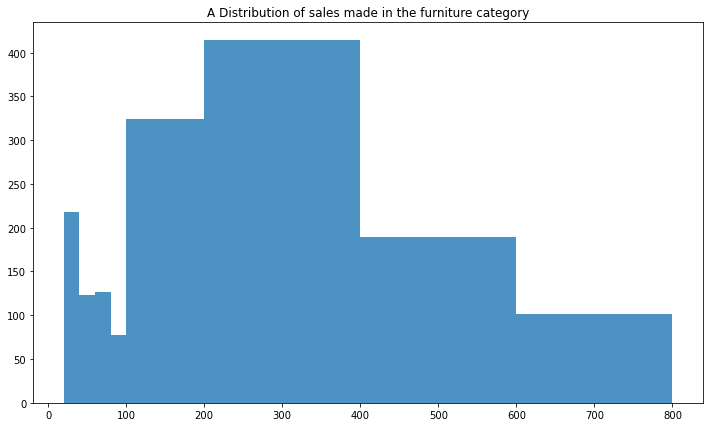

In [525]:
# A histogram depicting the sales made for furniture
plt.figure(figsize = (12, 7))
plt.hist(Sales_Report_df[Sales_Report_df["Category"] == "Furniture"]["Sales"], alpha = 0.8, bins = [20, 40, 60, 80, 100, 200, 400, 600, 800])
plt.title("A Distribution of sales made in the furniture category")
plt.show()

The above histogram chart indicate that most of the sales made in the furniture category has been between 200 and 400 range. This is a good call since the average sales for all the categories is 239. The chart also shows the lowest sales range for the furniture category which is within 90 to 100.

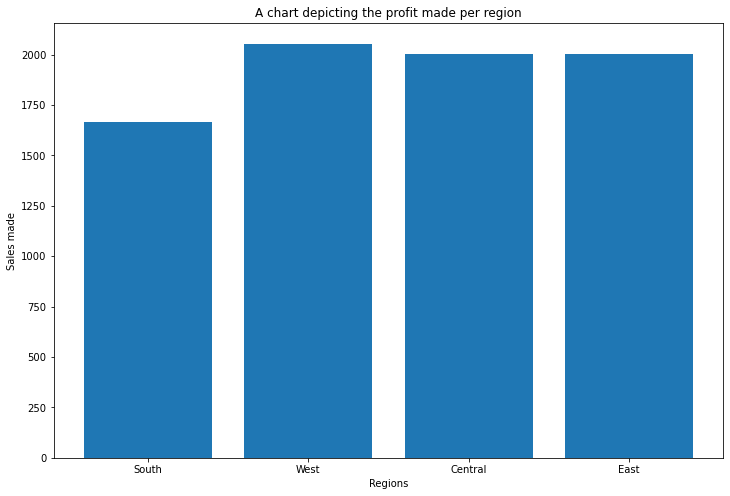

In [526]:
# A bar chart showing the sales made per region.
plt.figure(figsize = (12,8))
plt.bar(Sales_Report_df["Region"],  Sales_Report_df["Sales"])
plt.title("A chart depicting the profit made per region")
plt.xlabel("Regions")
plt.ylabel("Sales made")
plt.show()

The above chart indicates that the southern part of the country recorded the highest number of sales of more than 20000 dollars. In this instance more attention should be geared towards that region to maximize sales. More advertisement and sales discounts should be directed towards the eastern part of the country since it recorded the lowest number of sales among the regions.

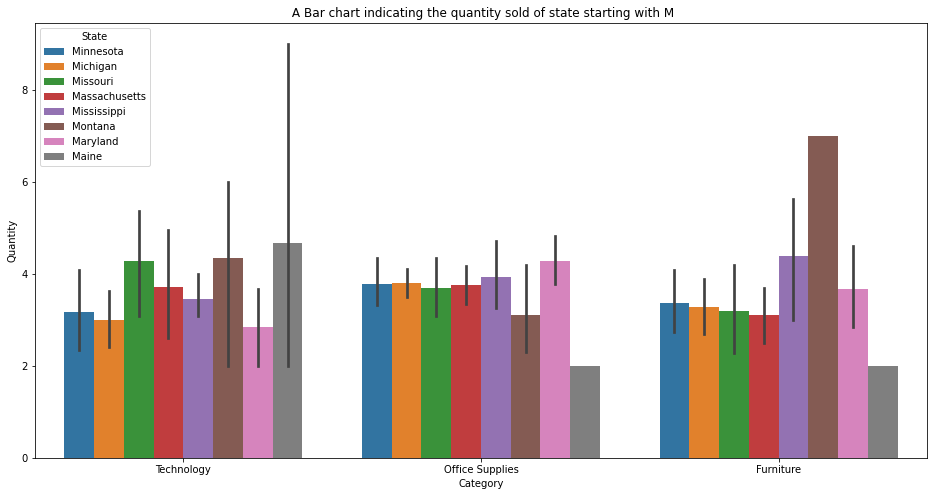

In [527]:
# A bar chart showing the quantity sold of states starting with "M".
plt.figure(figsize = (16, 8))
States_statistics = Sales_Report_df.loc[Sales_Report_df.loc[:, "State"].str.startswith("M")]

sns.barplot(x = "Category",
           y = "Quantity",
           hue = "State",
           data = States_statistics )
plt.title (" A Bar chart indicating the quantity sold of state starting with M" )
plt.show()

In the technology category, Maine state had the most quantity sold but sold the least in the Office Suppliers and furniture. This indicates that representatives in this state were concentrating on technology category since this category gives a higher profit and sales.

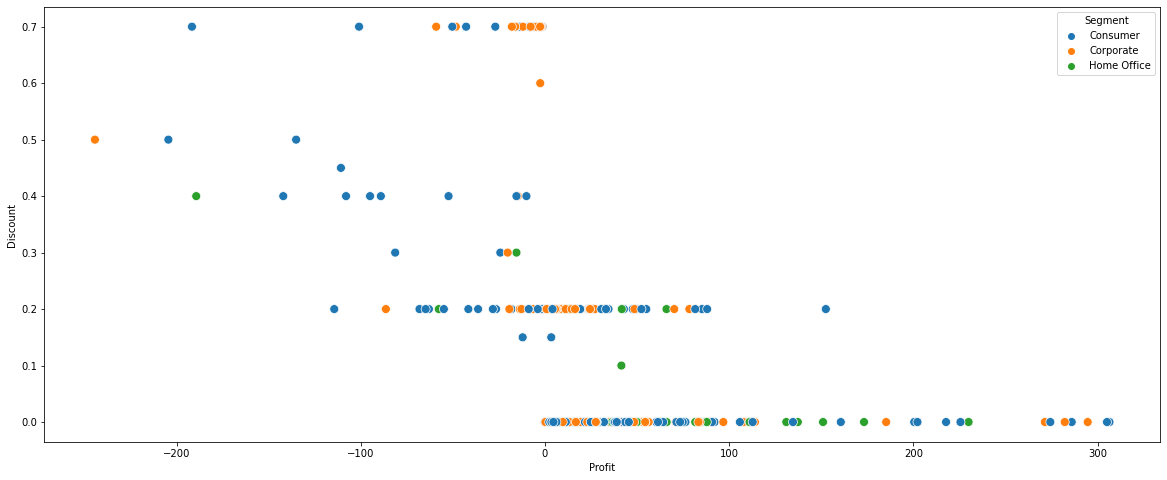

In [528]:
# A scatter chart indicating the segment, sales made and the sales discount granted to them of Cities ending with k.
plt.figure(figsize= (20, 8))
Sales_discount_per_segment = Sales_Report_df.loc[Sales_Report_df.loc[:, "City"].str.startswith("M")]
sns.scatterplot(x= "Profit", y= "Discount", hue= "Segment", s= 80, data= Sales_discount_per_segment)
plt.show()

From the chart above, it shows that the higher profit made the lower the sales discount given. In the context of discount given, most of the discounts were given to Coporate institutions and consumer since these segments purchased most of our products.

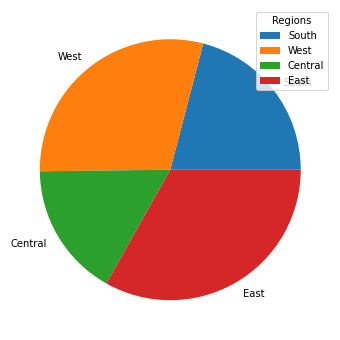

In [533]:
# A pie chart depicting the regions and the number of orders received
plt.figure(figsize = (14,6))
Region_and_order = Sales_Report_df.groupby("Region")
Number_of_orders_per_region = Region_and_order["Order ID"].count()
Regions = Sales_Report_df["Region"].unique()
plt.pie(Number_of_orders_per_region, labels = Regions)
plt.legend(title = "Regions", loc = "upper right")
plt.show()

From the above chart, the western part of the country had the most orders of our products. This number is not by much comparing it to the second highest, East. The least was the Southern part of the country and hence I would suggest that more attention should be geared towards this region in order to maximize sales across the country.

## PART 4: DATA INSIGHT

1.a. In performing the data categorization, i initially checked if there duplicated values in my dataset since          these may distort my analysis.
     I used the duplicate.any() keyword to assess if there are such values. 
    The dataset did not have much missing values as there were only 11 missing values in postal code representing       less than .1%.
    I removed all missing values in the postal code because in shipping products to customers the postal code is       very essential and any data that has no value in that sections needs to be cleaned.
    1.b. In calculating the descriptive statistics for the numeric values, I had to remove the postal code column before performing the calculations. This is because I realized that calculating the mean, mode, median for the postal code column would be meaningless as I cannot draw any relevant conclusion from these calculations.
  Performing the visualizations, I wanted to know the range within which the sales made for all product fall. I also wanted to know the region generating the most profit. I wanted to know which some state and city and the quantity of product sold within that state as well as the correlation between the sales discount and profit generated. This would help me know which state needs more improvement and other informed decisions.
  i. I would also like to find out the distribution of the profit made on all the products.
  ii. The product being ordered the most.
  iii. The most prefered date to ship products to customers.
1.c In analyzing the dataset, I discovered the following;
  1. Some states starting with "M" were concentrating on a particular product category while others were trying to      balance the quantity sold for all the categories.
  2. I realized that the southern part of the country were not generating enough profit as compared to the part of the country. This I think should be a great concern to the data analyst and the company directors can base on this analysis to find the roots to this lower profits.
  3. Office suppliers were the product category that used the shipping mode the most. This could be attributed to that fact most office suppliers were ordered in bulk and makes shipping this goods easiler.

## REFLECTION

### Experience performing this activity 

1. I was able to read my dataset from excel to python using pandas. This activity was not as easy as expected as my dataset was locked which was making it difficult to read. I had to copy the entire dataset into another excel file before I was able to read it.
2. In performing this activity, I was able to print the number of rows and columns of this dataset as well as the columns names. This acitivity was simple since it was discussed in the previous lab.
3. I was able to compute the descriptive statistics for the numeric cloumns and the mode and unique values in the non-numeric columns.
4. I was able create charts from the dataset and analyze them for decision-making.

### Importance of learning this activity

1. In this activity, I realized as a data analyst I have to check the columns and check if there are duplicated values in the dataset and clean them if any. This task helps to give a true reflection of the analysis from the dataset.
2. I learned that visualizing your dataset makes it easier to understand and interpret. 
3. Reading meaning into the visualized charts can help managers make informed decisions.

### A comparison of performing the activity in excel manually and in python

Perfoming this project in excel was too manual as I had to calculate the mean, mode, and other descriptive statistics individually. In performing this project in excel I spent alot of time calculating and creating a pivot table and chart.
Performing the activites of this project with python was automated hence it took less time in doing it. Though getting the right code to automate the proces was difficult in some instances to come by. Python programming provides a faster way to analyze and visualize your dataset as compared to excel.